In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
import taxis
from utils import *
from visualize import *
from sklearn.linear_model import *
from sklearn.kernel_ridge import *
from sklearn.pipeline import *
from sklearn.preprocessing import *

DBNAME="taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952

def level(row,max_value):
    d=max_value/4
    x=row['TaxiCount']
    if x <= d:
        return 0
    elif x <= 2*d:
        return 1
    elif x <= 37:
        return 3*d
    else:
        return 3

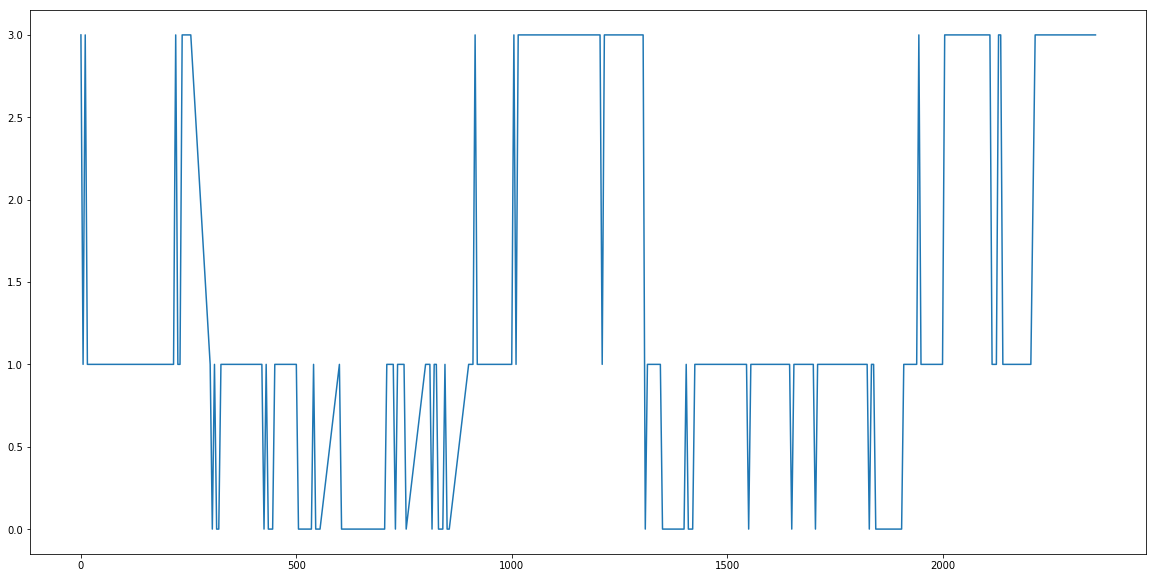

In [2]:
df=taxis.getdf_loc_dates(DBNAME,['20170627'],LAT1,LON1)
max_value=df.describe().loc['max']['TaxiCount']
df['Level']=df.apply(lambda x:level(x,max_value),axis=1)
df.head()
plot_data([(df['Time'].tolist(),df['Level'].tolist())])

[[  77.74390244]
 [ 113.36666667]
 [  25.92982456]
 [  49.12173913]]
[1 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3
 2 3 2 2 3 3 3 3 3 3 3 2 3 3 3 3 2 3 2 2 2 3 3 2 2 2 2 2 2 2 3 2 2 2 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 2 3 2 3 3 3 2 2 3 3 3 2 3 3 2 2 2 3 2 2 3 3 3 0
 3 3 3 0 3 0 3 3 0 0 3 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 2 3 3 3 3 3 3 3 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 0 3 3 3 3 3 3 0 0 3 3 3 2 3
 3 2 2 2 2 2 3 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0
 0 3 3 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


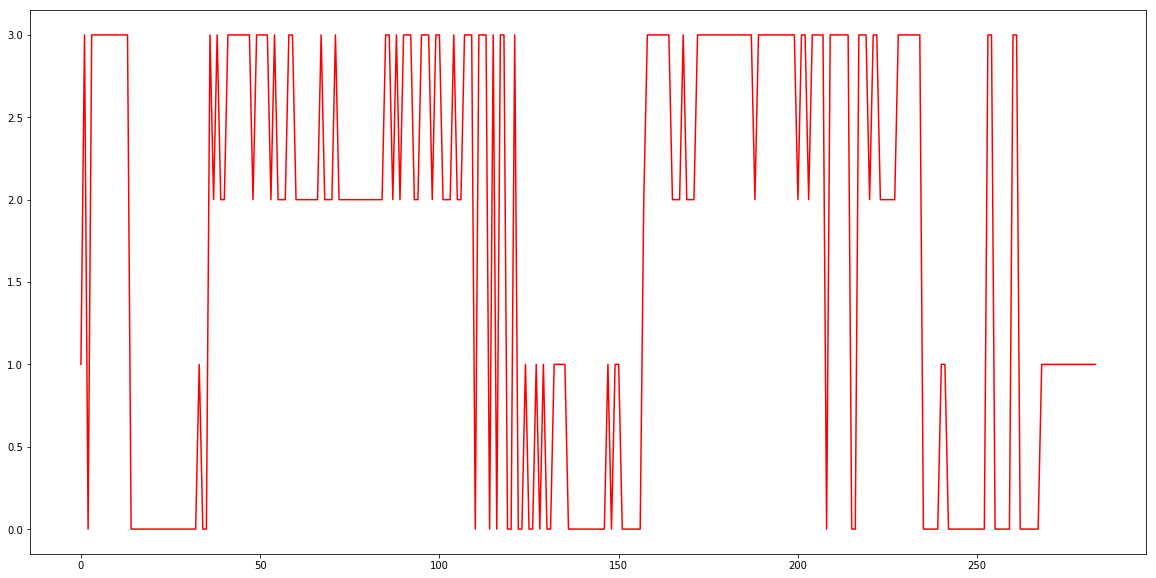

In [3]:
from sklearn.cluster import KMeans
X=df[['TaxiCount']].as_matrix()

X=X.reshape(-1,1)

kmeans = KMeans(n_clusters=4, random_state=0, precompute_distances=True).fit(X)


print kmeans.cluster_centers_
print kmeans.labels_

plt.plot(kmeans.predict(X),color='r')
plt.show()



In [4]:
df.query("Time=='2300'")

,Point,Time,X,Y,TaxiCount,Level
272,272,2300,20,5,127,3


In [6]:
kmeans.predict(127)

array([1], dtype=int32)

[[ 122.45588235   70.13235294]
 [  44.03370787   46.13483146]
 [ 259.           91.36734694]
 [ 195.5          45.52564103]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


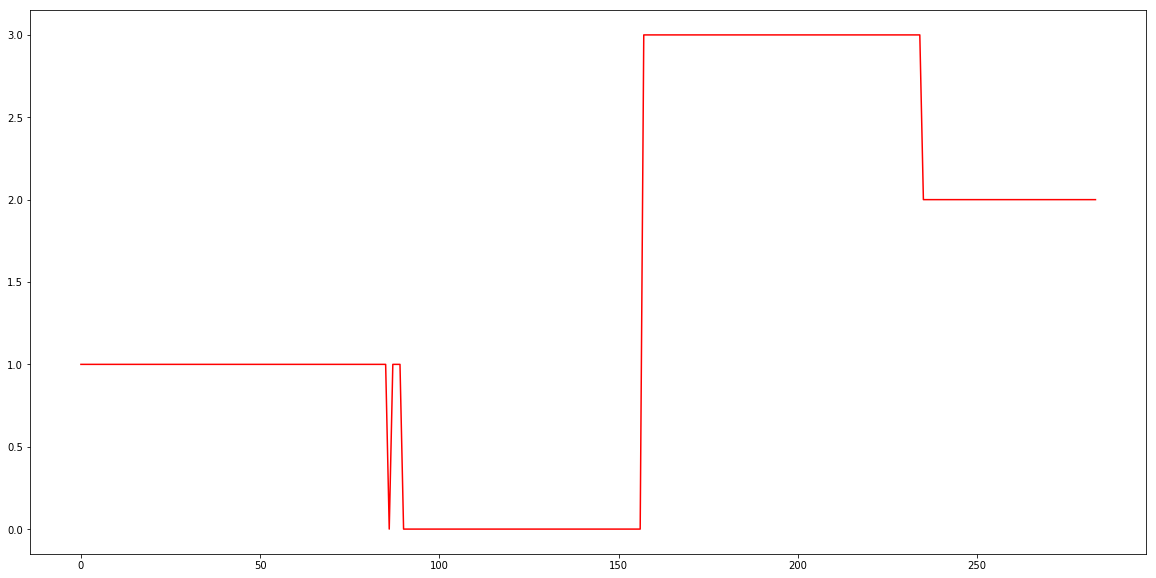

In [8]:
X=df[['Point','TaxiCount']].as_matrix()

kmeans = KMeans(n_clusters=4, random_state=0, precompute_distances=True).fit(X)


print kmeans.cluster_centers_
print kmeans.labels_

plt.plot(kmeans.predict(X),color='r')
plt.show()